## 葡萄酒種類判斷

In [1]:
# Training models
from sklearn.linear_model import LogisticRegression # 邏輯回歸 (LogisticRegression)
from sklearn.naive_bayes import GaussianNB # 貝式分類器 (Bayes Classifier)
from sklearn.neighbors import KNeighborsClassifier # KNN 
from sklearn.ensemble import RandomForestClassifier # 隨機森林 (RandomForestClassifier)
from sklearn.svm import SVC # 支持向量機 (Supper vector machine)

# 拆分數據
from sklearn.model_selection import train_test_split 

# 觀察及整理數據
import pandas as pd
import numpy as np

In [2]:
# 導入資料集
df = pd.read_csv('./wine.csv')
df.head()

,酒種類,酒精,蘋果酸,灰分,灰分鹼性,鎂,總酚,黃酮類,非黃酮酚,原花青素,顏色強度,色相,透光度,脯氨酸
0,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
1,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
2,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
3,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855
4,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   酒種類     160 non-null    int64  
 1   酒精      160 non-null    float64
 2   蘋果酸     160 non-null    float64
 3   灰分      160 non-null    float64
 4   灰分鹼性    160 non-null    float64
 5   鎂       160 non-null    int64  
 6   總酚      160 non-null    float64
 7   黃酮類     160 non-null    float64
 8   非黃酮酚    160 non-null    float64
 9   原花青素    160 non-null    float64
 10  顏色強度    160 non-null    float64
 11  色相      160 non-null    float64
 12  透光度     160 non-null    float64
 13  脯氨酸     160 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 17.6 KB


In [4]:
# 查看個項目
df.describe()

,酒種類,酒精,蘋果酸,灰分,灰分鹼性,鎂,總酚,黃酮類,非黃酮酚,原花青素,顏色強度,色相,透光度,脯氨酸
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,1.950000,13.008750,2.340313,2.355375,19.406250,99.775000,2.297563,2.023813,0.363812,1.590188,5.070750,0.960438,2.602000,741.168750
std,0.767254,0.813688,1.128274,0.270525,3.251873,14.137221,0.632160,0.999233,0.125302,0.574170,2.323196,0.230434,0.704872,315.620547
min,1.000000,11.030000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.410000,1.900000,0.480000,1.270000,278.000000
25%,1.000000,12.370000,1.597500,2.207500,17.175000,88.000000,1.735000,1.190000,0.270000,1.247500,3.240000,0.790000,1.952500,498.750000
50%,2.000000,13.050000,1.865000,2.355000,19.250000,98.000000,2.380000,2.120000,0.340000,1.555000,4.640000,0.960000,2.780000,675.000000
75%,3.000000,13.682500,3.105000,2.552500,21.500000,107.000000,2.807500,2.865000,0.442500,1.952500,6.212500,1.120000,3.170000,973.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


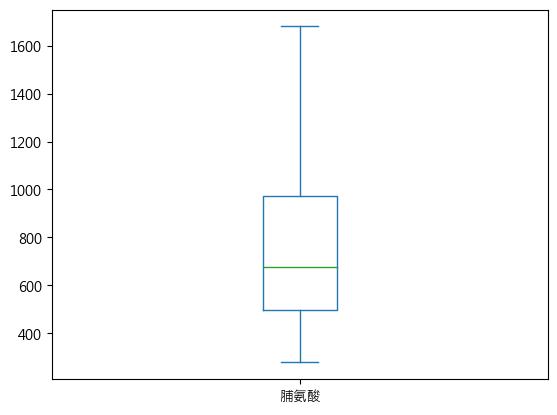

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示中文字
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
df['脯氨酸'].plot.box();

**可以大概知到除了 `脯氨酸` 之外其他的 mean, median 跟 variance 都還不錯，而 `脯氨酸` 比較多 outliers 因此使用 MinMaxScaler 做 Noemalization**

In [6]:
# 拆分 X 和 y
X = df.drop('酒種類', axis=1)
y = df['酒種類']

X.shape, y.shape

((160, 13), (160,))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
nor_X = scaler.fit_transform(X)

In [8]:
# 拆分訓練集及測試集
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128, 13), (32, 13), (128,), (32,))

In [9]:
# 定義 models
models = {
    'LogisticRegressor': LogisticRegression(solver='lbfgs', max_iter=1000),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()}

# 定義訓練 model 函數
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Use train set to fit model and score the test set
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    models are packaged in dictionary
    """
    np.random.seed(42)
    
    model_score = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # sabe the score
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [10]:
# 分類準確率
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegressor': 0.96875,
 'GaussianNB': 1.0,
 'KNeighborsClassifier': 0.90625,
 'RandomForestClassifier': 0.96875,
 'SVC': 1.0}

### End